In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


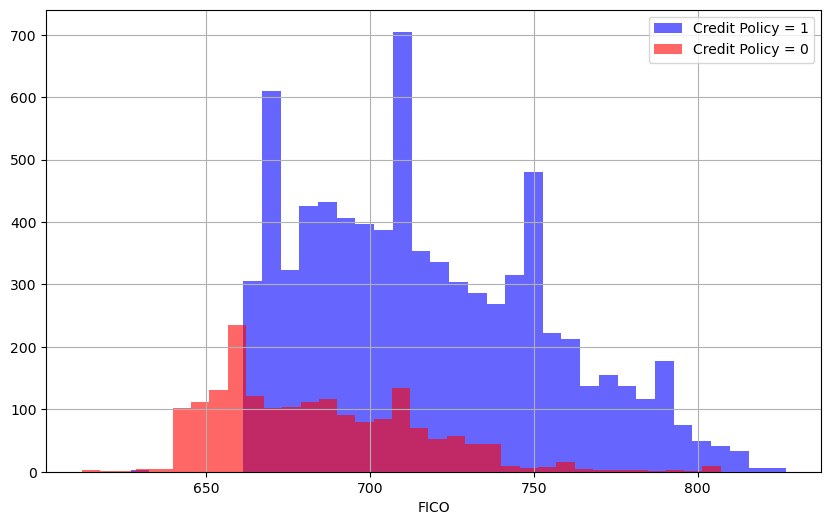

In [37]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(bins=35, color='blue', label='Credit Policy = 1', alpha=0.6)
df[df['credit.policy']==0]['fico'].hist(bins=35, color='red', label='Credit Policy = 0', alpha=0.6)
plt.legend()
plt.xlabel('FICO')
plt.show()

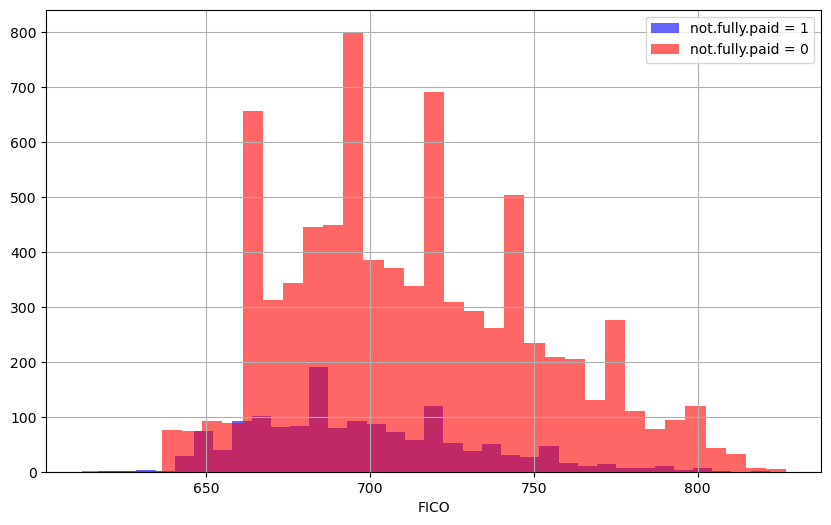

In [38]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=35, color='blue', label='not.fully.paid = 1', alpha=0.6)
df[df['not.fully.paid']==0]['fico'].hist(bins=35, color='red', label='not.fully.paid = 0', alpha=0.6)
plt.legend()
plt.xlabel('FICO')
plt.show()

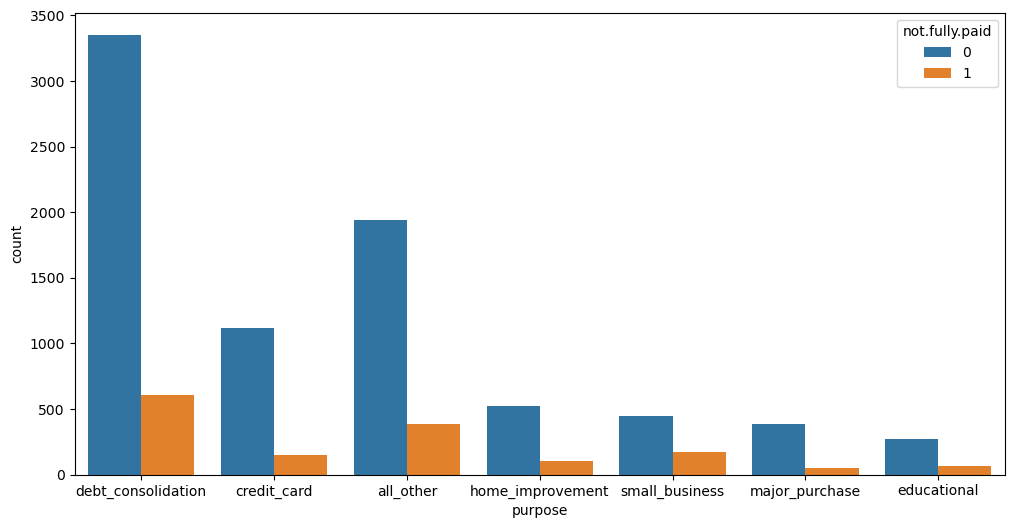

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='purpose', hue='not.fully.paid')
plt.show()

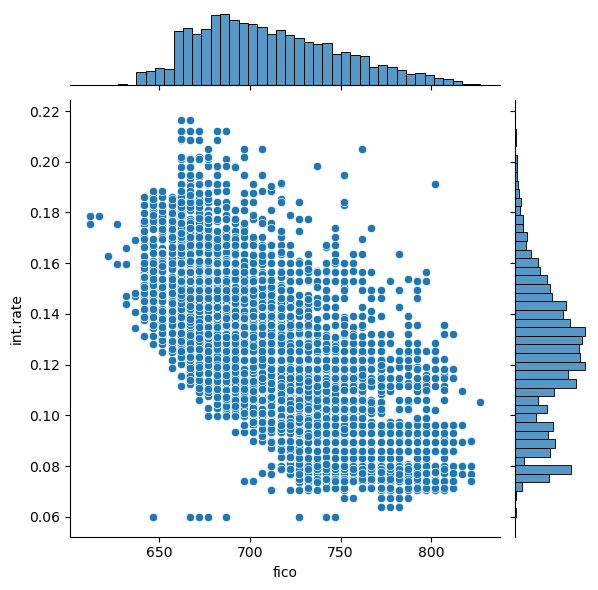

In [18]:
sns.jointplot(data=df, x='fico', y='int.rate')
plt.show()

<Figure size 1200x600 with 0 Axes>

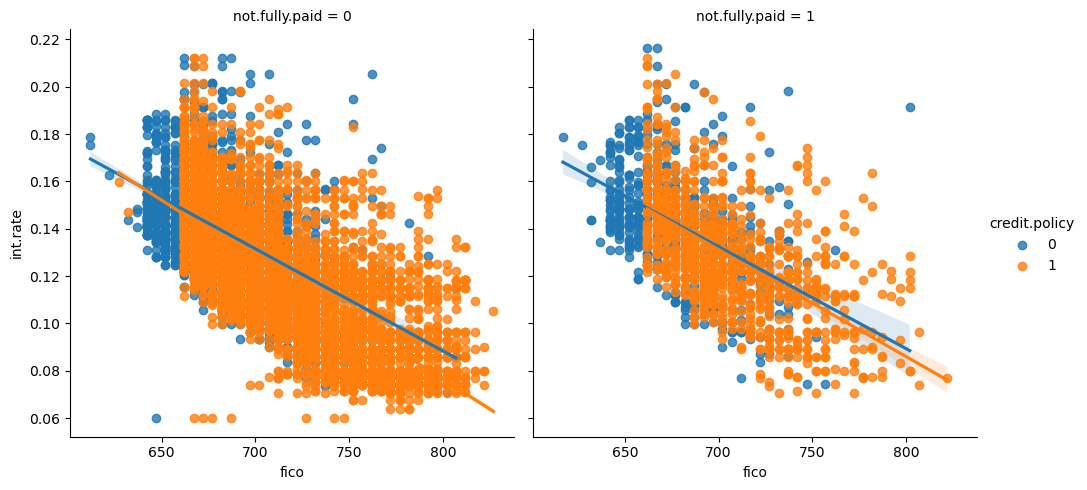

In [42]:
plt.figure(figsize=(12,6))
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid')
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [46]:
cat_feats = ['purpose']

In [48]:
final_data = pd.get_dummies(data=df, columns=cat_feats, drop_first=True).astype(int)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0,829,11,19,737,5639,28854,52,0,0,0,0,0,1,0,0,0,0
1,1,0,228,11,14,707,2760,33623,76,0,0,0,0,1,0,0,0,0,0
2,1,0,366,10,11,682,4710,3511,25,1,0,0,0,0,1,0,0,0,0
3,1,0,162,11,8,712,2699,33667,73,1,0,0,0,0,1,0,0,0,0
4,1,0,102,11,14,667,4066,4740,39,0,1,0,0,1,0,0,0,0,0


In [49]:
from sklearn.model_selection import train_test_split

In [55]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtree = DecisionTreeClassifier()

In [58]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
pred = dtree.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [62]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier(n_estimators=300)

In [67]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [69]:
pred2 = rfc.predict(X_test)

In [70]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.52      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874

